In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matlplotlib inline

UsageError: Line magic function `%matlplotlib` not found.


In [2]:
from sklearn.datasets import load_diabetes
df = load_diabetes()

In [3]:
df.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [4]:
df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [8]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
X = pd.DataFrame(df.data, columns=df.feature_names)

In [10]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
y = pd.DataFrame(df.target, columns=['target'])

In [12]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,classification_report,confusion_matrix,accuracy_score

In [21]:
dr = DecisionTreeRegressor()
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
from sklearn.model_selection import GridSearchCV

In [24]:
parms= {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20,25],
    'max_features':['auto','sqrt','log2'],
}


In [25]:
grid = GridSearchCV(dr,param_grid=parms,cv=5,scoring='neg_mean_squared_error')

In [26]:
grid.fit(X_train,y_train)

In [27]:
y_pred = grid.predict(X_test)

In [28]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [31]:
selectedmodel = DecisionTreeRegressor(criterion='friedman_mse',max_depth=3,max_features='log2',splitter='best')

In [32]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

In [33]:
y_pred = selectedmodel.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3852.103321317058
52.26390096886756
0.27293450543473274


In [36]:
from sklearn import tree

[Text(0.5, 0.875, 'x[9] <= 0.034\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.625, 'x[3] <= 0.027\nfriedman_mse = 5003.295\nsamples = 271\nvalue = 137.982'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.012\nfriedman_mse = 3820.134\nsamples = 207\nvalue = 123.304'),
 Text(0.0625, 0.125, 'friedman_mse = 3557.329\nsamples = 149\nvalue = 114.141'),
 Text(0.1875, 0.125, 'friedman_mse = 3725.407\nsamples = 58\nvalue = 146.845'),
 Text(0.375, 0.375, 'x[8] <= -0.031\nfriedman_mse = 5879.779\nsamples = 64\nvalue = 185.453'),
 Text(0.3125, 0.125, 'friedman_mse = 3890.938\nsamples = 8\nvalue = 115.25'),
 Text(0.4375, 0.125, 'friedman_mse = 5359.25\nsamples = 56\nvalue = 195.482'),
 Text(0.75, 0.625, 'x[8] <= 0.0\nfriedman_mse = 6091.425\nsamples = 82\nvalue = 205.805'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.076\nfriedman_mse = 2371.986\nsamples = 17\nvalue = 118.882'),
 Text(0.5625, 0.125, 'friedman_mse = 1253.438\nsamples = 16

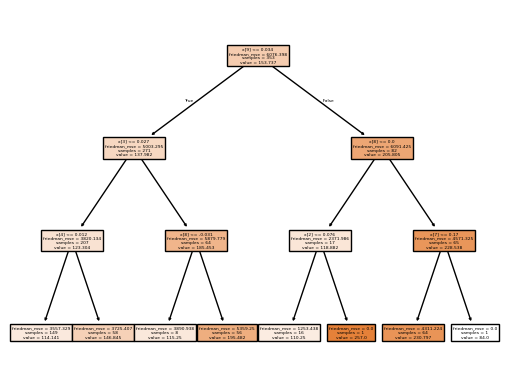

In [37]:
tree.plot_tree(selectedmodel,filled=True)